In [11]:
import tensorflow as tf
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
#60,000 training samples and 10,000 test samples

preprocessing is needed because neural networks work better when numbers are small and shapes are consistent 

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0
#pixels are now between 0 and 1

now reshaping for CNN because CNNs expect (height, width, channels)

In [14]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [15]:
#converting labels to one hot encoding 
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
#the model outputs probabilities for 10 classes, labels must match that format

now building the CNN
a CNN looks at small parts of the image
learns edges - shapes - objects 
is much better than normal neural networks for images

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential() #layers will be stacked one after another
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
#32 filters scan the image, each filter looks at 3x3 pixels, learns edges and textures
model.add(MaxPooling2D((2, 2))) #pooling to reduce image size, keeps important features and makes model faster


c:\Users\mihika\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
#second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2))) #learns more complex patterns 
model.add(Flatten()) #flattening 2D arrays to 1D for dense layers
model.add(Dense(128, activation='relu')) #fully connected layer with 128 neurons
model.add(Dropout(0.5)) #dropout to prevent overfitting
model.add(Dense(10, activation='softmax')) #output layer for 10 classes

In [18]:
#compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
#train the model
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.1
) #train for 5 passes, use 90% of data for training and 10% for validation

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.7921 - loss: 0.5823 - val_accuracy: 0.8667 - val_loss: 0.3657
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.8589 - loss: 0.3910 - val_accuracy: 0.8825 - val_loss: 0.3116
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.8783 - loss: 0.3388 - val_accuracy: 0.8813 - val_loss: 0.3017
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.8871 - loss: 0.3059 - val_accuracy: 0.9005 - val_loss: 0.2649
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.8957 - loss: 0.2822 - val_accuracy: 0.9100 - val_loss: 0.2457


In [20]:
#evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)
#answers how good is the model on unseen data 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9027 - loss: 0.2678
Test Accuracy: 0.9027000069618225


VISUALISATIONS

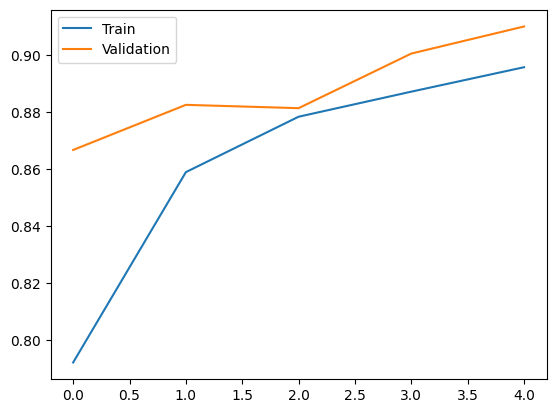

In [21]:
#accuracy graph
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


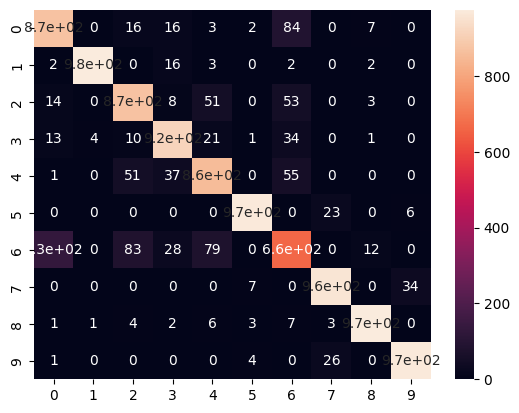

In [24]:
#confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

sns.heatmap(cm, annot=True)
plt.show()


In [25]:
model.save("fashion_model.h5")


In [26]:
%pip install streamlit pillow


  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
   ---------------------------------------- 0.0/9.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.0 MB 6.7 MB/s eta 0:00:02
   ------------ --------------------------- 2.9/9.0 MB 7.0 MB/s eta 0:00:01
   ------------------ --------------------- 4.2/9.0 MB 6.8 MB/s eta 0:00:01
   ---------------------- ----------------- 5.0/9.0 MB 6.7 MB/s eta 0:00:01
   --------------------------- ------------ 6.3/9.0 MB 6.1 MB/s eta 0:00:01
   ---------------------------------- ----- 7.9/9.0 MB 6.2 MB/s eta 0:00:01
   --------------